In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical

In [14]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [15]:
x_train = x_train/255.0
x_test = x_test/255.0

In [16]:
y_train = to_categorical(y_train,num_classes=10)
y_test = to_categorical(y_test,num_classes=10)

In [17]:
model = Sequential()
model.add(Conv2D(32, (3,3),activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [18]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten_1 (Flatten)         (None, 576)              

In [20]:
h = model.fit(x_train,y_train,epochs=10,validation_data=(x_test,y_test))

Epoch 1/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.1257 - accuracy: 0.9530 - val_loss: 0.2700 - val_accuracy: 0.9131
Epoch 2/10
1875/1875 [==============================] - 27s 15ms/step - loss: 0.1163 - accuracy: 0.9561 - val_loss: 0.2870 - val_accuracy: 0.9116
Epoch 3/10
1875/1875 [==============================] - 29s 16ms/step - loss: 0.1075 - accuracy: 0.9580 - val_loss: 0.3197 - val_accuracy: 0.9112
Epoch 4/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0979 - accuracy: 0.9627 - val_loss: 0.3125 - val_accuracy: 0.9087
Epoch 5/10
1875/1875 [==============================] - 31s 17ms/step - loss: 0.0918 - accuracy: 0.9654 - val_loss: 0.3461 - val_accuracy: 0.9072
Epoch 6/10
1875/1875 [==============================] - 40s 22ms/step - loss: 0.0862 - accuracy: 0.9668 - val_loss: 0.3396 - val_accuracy: 0.9095
Epoch 7/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0795 - accuracy: 0.9704 - val_loss: 0.3821 -

In [21]:
r = pd.DataFrame(h.history)
r['Epochs'] = h.epoch
r.tail()

,loss,accuracy,val_loss,val_accuracy,Epochs
5,0.086219,0.966833,0.339591,0.9095,5
6,0.079496,0.970367,0.382066,0.9079,6
7,0.074668,0.971767,0.392960,0.9090,7
8,0.070847,0.972517,0.400563,0.9074,8
9,0.064286,0.975433,0.416068,0.9093,9


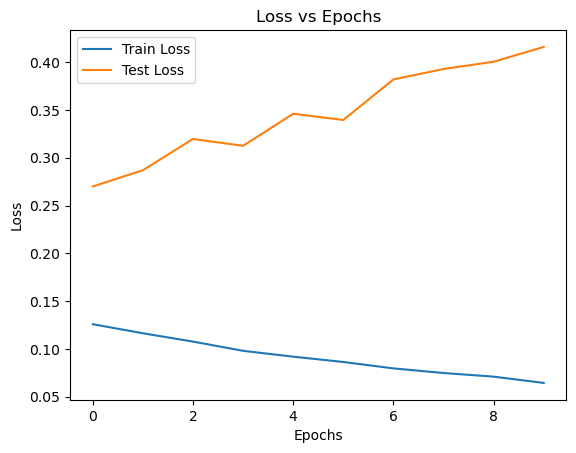

In [26]:
plt.plot(r['Epochs'],r['loss'],label='Train Loss')
plt.plot(r['Epochs'],r['val_loss'],label='Test Loss')
plt.title('Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

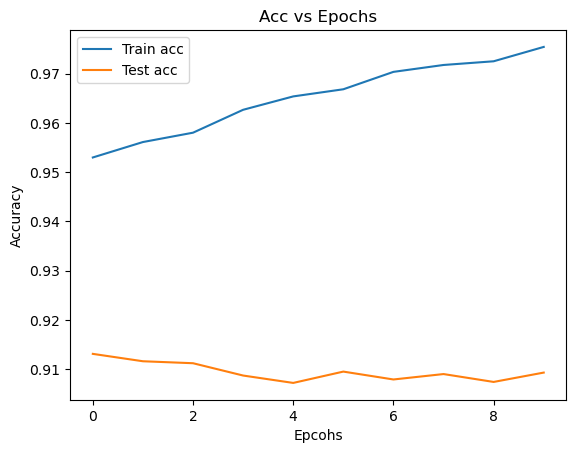

In [31]:
plt.plot(r['Epochs'],r['accuracy'],label='Train acc')
plt.plot(r['Epochs'],r['val_accuracy'],label='Test acc')
plt.title('Acc vs Epochs')
plt.xlabel('Epcohs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [35]:
ypred = model.predict(x_test)
print(ypred[:3])

313/313 [==============================] - 2s 7ms/step
[[2.4031098e-20 3.4346847e-22 8.0990480e-24 1.5804024e-23 3.4472413e-25
  3.8355240e-13 5.0832076e-22 2.6188426e-11 6.7467207e-17 1.0000000e+00]
 [3.1067177e-08 2.7994719e-20 9.9999917e-01 1.0189330e-15 3.5456244e-14
  3.5546245e-21 8.4806106e-07 1.8463417e-26 5.3208111e-16 1.5938633e-19]
 [6.4136522e-30 1.0000000e+00 1.1465196e-36 4.9694813e-26 9.5198374e-34
  0.0000000e+00 5.8448882e-38 7.5685059e-35 4.0808694e-32 0.0000000e+00]]


In [38]:
predict_label =[np.argmax(i) for i in ypred]
print(predict_label[:10])

[9, 2, 1, 1, 6, 1, 4, 6, 5, 7]


In [45]:
print("Confusion Matrix:")
print(confusion_matrix(np.argmax(y_test, axis=1), predict_label))
print("\nClassification Report:")
print(classification_report(np.argmax(y_test, axis=1), predict_label))

Confusion Matrix:
[[862   0  24  11   1   0  89   0  13   0]
 [  5 981   1   7   2   0   2   0   2   0]
 [ 19   1 899   3  38   0  38   0   2   0]
 [ 25  14  15 889  27   0  29   0   1   0]
 [  1   0  60  21 860   0  54   0   3   1]
 [  0   0   0   0   0 961   0  22   0  17]
 [109   1  89  22  57   0 713   0   9   0]
 [  0   0   0   0   0   4   0 980   0  16]
 [  1   0   2   5   3   1   3   1 983   1]
 [  1   0   0   0   0   1   0  33   0 965]]

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.86      0.85      1000
           1       0.98      0.98      0.98      1000
           2       0.82      0.90      0.86      1000
           3       0.93      0.89      0.91      1000
           4       0.87      0.86      0.87      1000
           5       0.99      0.96      0.98      1000
           6       0.77      0.71      0.74      1000
           7       0.95      0.98      0.96      1000
           8       0.97      0.98      0